# Desafio Kaggle Titanic


##O objetivo deste notebook é seguir um fluxo de trabalho passo a passo, explicando cada passo e justificativa para cada decisão que tomamos durante o desenvolvimento da solução.

#Estapas do desafio

###Ao todo serão sete etapas

1. Definição do problema.
2. Aquisição dos dados de treino e teste.
3. Preparar, limpar dados.
4. Analisar, identificar padrões e explorar os dados.
5. Modelar, prevr e resolver o problema.
6. Visualizar, relatar e apresentar as estapas de solução de problemas e a solução final.
7. Fornecer e enviar os resultados.

###O fluxo de trabalho indica a sequência geral de como cada estágio pode seguir o outro. No entanto, existem casos de uso com exceções.

*Podemos combinar vários estágios de fluxo de trabalho. Podemos analisar visualizando os dados.

*Realize uma etapa antes do indicado. Podemos analisar os dados antes de depois.

*Execute um estágio várias vezes em nosso fluxo de trabalho. O estágio de visualização pode ser usado várias vezes.

##Defnição de Problema

Sites de competição como o Kaggle definem o problema a ser resolvido ou as perguntas a serem feitas enquanto fornecem os conjuntos de dados para treinar seu modelo de ciência de dados e testar os resultados do modelo em um conjunto de dados de teste. A questão ou definição do problema para a competição Titanic sobreviventes

Também podemos querer desenvolver algum entendimento inicial sobre o domínio do nosso problema. Isso é descrito na página de descrição da competição Kaggle aqui. Aqui estão os destaques a serem observados.

* Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1.502 dos 2.224 passageiros e tripulantes. Taxa de sobrevivência traduzida de 32%.

* Uma das razões pelas quais o naufrágio levou a tantas perdas de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes.

* Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

# Objetivos

O fluxo de trabalho de soluções de ciência de dados resolve sete objetivos principais.


__Classificando__. Podemos querer classificar ou categorizar nossas amostras. Também podemos entender as implicações ou a correlação de diferentes classes com nosso objetivo de solução.

__Correlacionando__. Pode-se abordar o problema com base nos recursos disponíveis no conjunto de dados de treinamento. Quais recursos dentro do conjunto de dados contribuem significativamente para nossa meta de solução? Estatisticamente falando, existe uma correlação entre um recurso e o objetivo da solução? À medida que os valores dos recursos mudam, o estado da solução também muda e vice-versa? Isso pode ser testado para recursos numéricos e categóricos no conjunto de dados fornecido. Também podemos determinar a correlação entre recursos que não sejam de sobrevivência para objetivos subsequentes e estágios de fluxo de trabalho. A correlação de certos recursos pode ajudar na criação, conclusão ou correção de recursos.

__Convertendo__. Para o estágio de modelagem, é preciso preparar os dados. Dependendo da escolha do algoritmo do modelo, pode-se exigir que todos os recursos sejam convertidos em valores numéricos equivalentes. Por exemplo, converter valores categóricos de texto em valores numéricos.

__Completando__. A preparação de dados também pode exigir que estimemos quaisquer valores ausentes em um recurso. Algoritmos de modelo podem funcionar melhor quando não há valores omissos.

__Corrigindo__. Também podemos analisar o conjunto de dados de treinamento fornecido em busca de erros ou valores possivelmente imprecisos nos recursos e tentar corrigir esses valores ou excluir as amostras que contêm os erros. Uma maneira de fazer isso é detectar quaisquer outliers entre nossas amostras ou recursos. Também podemos descartar completamente um recurso se ele não estiver contribuindo para a análise ou puder distorcer significativamente os resultados.

__Criando__. Podemos criar novos recursos com base em um recurso existente ou em um conjunto de recursos, de modo que o novo recurso siga as metas de correlação, conversão e integridade.

__Gráficos__. Como selecionar os gráficos e plotagens de visualização corretos, dependendo da natureza dos dados e dos objetivos da solução.

# Problemas de portabilidade
* Especifique as dimensões do gráfico, traga a legenda para o gráfico.

# Boas Práticas
* Realizar análise de correlação de recursos no início do projeto.
* Usando vários gráficos em vez de sobreposições para facilitar a leitura.


In [ ]:
#  análise de dados 
import pandas as pd
import numpy as np
import random as rnd

# visualização
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Adquirir dados
Os pacotes Python Pandas nos ajudam a trabalhar com nossos conjuntos de dados. Começamos adquirindo os conjuntos de dados de treinamento e teste em Pandas DataFrames. Também combinamos esses conjuntos de dados para executar determinadas operações em ambos os conjuntos de dados juntos.


In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
combine = [train_df, test_df]

# Analizando descrevendo os dados 


O Pandas também ajuda a descrever os conjuntos de dados respondendo às seguintes perguntas no início de nosso projeto.

__Quais recursos estão disponíveis no conjunto de dados?__

Observar os nomes dos recursos para manipulá-los ou analisá-los diretamente. Esses nomes de recursos são descritos na página de dados do Kaggle

In [ ]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


__Quais recursos são categóricos?__

Esses valores classificam as amostras em conjuntos de amostras semelhantes. Dentro dos recursos categóricos, os valores são nominais, ordinais, racionais ou baseados em intervalos? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

* __Categorias__: Survived, Sex, and Embarked. Ordinal: Pclass.


__Quais recursos são numéricos?__

Quais recursos são numéricos? Esses valores mudam de amostra para amostra. Dentro dos recursos numéricos, os valores são discretos, contínuos ou baseados em séries temporais? Entre outras coisas, isso nos ajuda a selecionar os gráficos apropriados para visualização.

* __Contínuo__: Age, Fare. __distinto__: SibSp, Parch.

In [ ]:
train_df.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


__Quais recursos são tipos de dados mistos?__

Dados numéricos, alfanuméricos dentro do mesmo recurso. Estes são candidatos a correção.

* Ticket é uma mistura de tipos de dados numéricos e alfanuméricos. A cabine é alfanumérica.

__Quais recursos podem conter erros ou erros de digitação?__

Isso é mais difícil de revisar para um grande conjunto de dados, no entanto, revisar algumas amostras de um conjunto de dados menor pode nos informar diretamente quais recursos podem exigir correção.

* O recurso de nome pode conter erros ou erros de digitação, pois há várias maneiras usadas para descrever um nome, incluindo títulos, colchetes e aspas usadas para nomes alternativos ou curtos.

In [ ]:
train_df.tail(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


__Quais recursos contêm valores em branco, nulos ou vazios?__

Estes exigirão correção.

* Cabin > Age > Embarked  os recursos contêm vários valores nulos nessa ordem para o conjunto de dados de treinamento.

* Cabin > Age  estão incompletos no caso do conjunto de dados de teste.

__Quais são os tipos de dados para vários recursos?__

Ajudando-nos durante a meta de conversão.

* Sete recursos são inteiros ou flutuantes. Seis no caso do conjunto de dados de teste.

* Cinco recursos são strings (objeto).


In [ ]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

__Qual é a distribuição de valores de características numéricas nas amostras?__

Isso nos ajuda a determinar, entre outras percepções iniciais, quão representativo é o conjunto de dados de treinamento do domínio real do problema.

* As amostras totais são 891 ou 40% do número real de passageiros a bordo do Titanic (2.224).
* Survived é um recurso categórico com valores 0 ou 1.
* Cerca de 38% das amostras sobreviveram representativas da taxa de sobrevivência real de 32%.
* A maioria dos passageiros (> 75%) não viajou com pais ou filhos.
* Quase 30% dos passageiros tinham irmãos e/ou cônjuge a bordo.
* As tarifas variaram significativamente com poucos passageiros (<1%) pagando até $ 512.
* Poucos passageiros idosos (<1%) na faixa etária de 65 a 80 anos.

In [ ]:
train_df.describe()
# Revise a taxa de sobrevivência usando `percentiles=[.61, .62]`sabendo que nossa descrição do problema menciona uma taxa de sobrevivência de 38%.
# Revise a distribuição do Parch usando `percentiles=[.75, .8]
# SibSp distribuição `[.68, .69]`
# # Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


__Qual é a distribuição de características categóricas?__
* Os nomes são exclusivos no conjunto de dados (count=unique=891)
* Variável sexo como dois valores possíveis com 65% masculino (topo=masculino, freq=577/contagem=891).
* Os valores de cabine têm várias duplicatas nas amostras. Como alternativa, vários passageiros compartilhavam uma cabine.
* Embarked leva três valores possíveis. Porta S usada pela maioria dos passageiros (top=S)
* O recurso de ticket tem alta proporção (22%) de valores duplicados (único = 681).

In [ ]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#Suposições baseadas na análise de dados


Chegamos às seguintes suposições com base na análise de dados feita até agora. Podemos validar essas suposições antes de tomar as ações apropriadas.

__Correlacionando.__

Queremos saber o quão bem cada recurso se correlaciona com a Sobrevivência. Queremos fazer isso no início de nosso projeto e combinar essas correlações rápidas com correlações modeladas posteriormente no projeto.

__Completando.__

1. Podemos querer completar o recurso Idade, pois está definitivamente relacionado à sobrevivência.

2. Podemos querer completar o recurso Embarked, pois também pode estar correlacionado com a sobrevivência ou outro recurso importante.

__Corrigindo.__

1. O recurso Ticket pode ser descartado de nossa análise, pois contém uma alta proporção de duplicatas (22%) e pode não haver uma correlação entre Ticket e sobrevivência.
2. O recurso de cabine pode ser descartado, pois é altamente incompleto ou contém muitos valores nulos no conjunto de dados de treinamento e teste.
3. PassengerId pode ser descartado do conjunto de dados de treinamento, pois não contribui para a sobrevivência.
4. O recurso de nome é relativamente fora do padrão, pode não contribuir diretamente para a sobrevivência, portanto, pode ser descartado.

__Criando.__

1. Podemos criar um novo recurso chamado Família baseado em Parch e SibSp para obter a contagem total de membros da família a bordo.
2. Podemos querer projetar o recurso Nome para extrair o Título como um novo recurso.
3. Podemos querer criar um novo recurso para faixas etárias. Isso transforma um recurso numérico contínuo em um recurso categórico ordinal.
4. Também podemos criar um recurso de intervalo de tarifas se isso ajudar em nossa análise.

__Classificando.__

Também podemos acrescentar às nossas suposições com base na descrição do problema observada anteriormente.

1. As mulheres (sexo=feminino) tiveram maior probabilidade de sobreviver.
2. As crianças (Idade <?) eram mais propensas a ter sobrevivido.
3. Os passageiros da classe alta (Pclass=1) tinham mais chances de sobreviver.

# Analise por recursos dinâmicos

Para confirmar algumas de nossas observações e suposições, podemos analisar rapidamente nossas correlações de recursos girando os recursos uns contra os outros. Só podemos fazer isso neste estágio para recursos que não possuem valores vazios. Também faz sentido fazê-lo apenas para recursos do tipo categórico (Sex), ordinal (Pclass) ou discreto (SibSp, Parch).

__Pclass__ Observamos correlação significativa (>0,5) entre Pclass=1 e Sobreviveu (classificação #3). Decidimos incluir esse recurso em nosso modelo.

__Sex__ Confirmamos a observação durante a definição do problema de que Sexo=feminino teve uma taxa de sobrevivência muito alta em 74% (classificação #1).


__SibSp e Parch__ Esses recursos têm correlação zero para determinados valores. Pode ser melhor derivar um recurso ou um conjunto de recursos desses recursos individuais (criando #1).



In [ ]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [ ]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [ ]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [ ]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# Analise visualização dos dados


Agora podemos continuar confirmando algumas de nossas suposições usando visualizações para analisar os dados.

## Correlacionando características numéricas
Vamos começar entendendo as correlações entre os recursos numéricos e nosso objetivo de solução (Sobreviveu).

Um gráfico de histograma é útil para analisar variáveis ​​numéricas contínuas, como idade, em que faixas ou intervalos ajudarão a identificar padrões úteis. O histograma pode indicar a distribuição de amostras usando compartimentos definidos automaticamente ou faixas com intervalos iguais. Isso nos ajuda a responder a perguntas relacionadas a bandas específicas (os bebês tiveram melhor taxa de sobrevivência?)

Observe que o eixo x nas visualizações do histograma representa a contagem de amostras ou passageiros.

__Observações.__

* Bebês (Idade <=4) tiveram alta taxa de sobrevivência.
* Os passageiros mais velhos (idade = 80) sobreviveram.
* Um grande número de jovens de 15 a 25 anos não sobreviveu.
* A maioria dos passageiros está na faixa etária de 15 a 35 anos.

__Decisões.__


Essa análise simples confirma nossas suposições como decisões para os estágios subsequentes do fluxo de trabalho.

* Devemos considerar a idade (nossa classificação de suposição nº 2) em nosso treinamento de modelo.
* Complete o recurso Age para valores nulos (completando #1).
* Devemos faixas etárias (criando # 3).


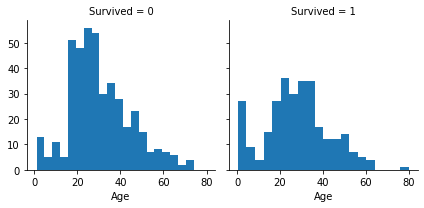

In [ ]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20);

# Correlacionando características numéricas e ordinais

Podemos combinar vários recursos para identificar correlações usando um único gráfico. Isso pode ser feito com recursos numéricos e categóricos que possuem valores numéricos.

__Observations.__


* Pclass=3 tinha a maioria dos passageiros, porém a maioria não sobreviveu. Confirma nossa suposição de classificação #2.
* Os passageiros infantis em Pclass=2 e Pclass=3 sobreviveram em sua maioria. Qualifica ainda mais nossa suposição de classificação nº 2.
* A maioria dos passageiros em Pclass=1 sobreviveu. Confirma nossa suposição de classificação #3.
* A Pclass varia em termos de distribuição etária dos passageiros.

__Decisões.__

* Considere Pclass para treinamento de modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


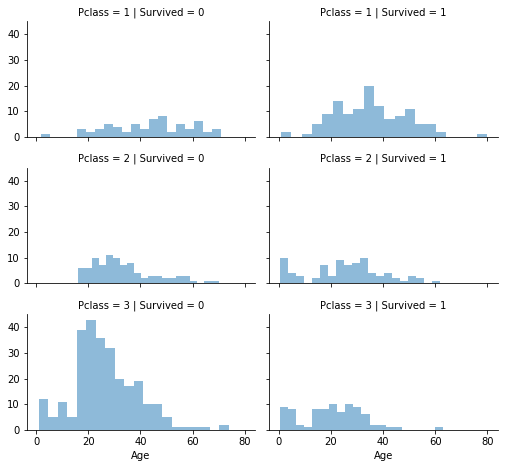

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

# Correlacionando características categóricas


Agora podemos correlacionar recursos categóricos com nosso objetivo de solução.

__Observações.__

* Passageiras do sexo feminino tiveram uma taxa de sobrevivência muito melhor do que os homens. Confirma a classificação (#1).
* Exceção em Embarked=C onde os homens tiveram maior taxa de sobrevivência. Isso pode ser uma correlação entre Pclass e Embarked e, por sua vez, Pclass e Survived, não necessariamente uma correlação direta entre Embarked e Survived.
* Os homens tiveram melhor taxa de sobrevivência em Pclass=3 quando comparados com Pclass=2 para as portas C e Q. Completando (#2).
* Os portos de embarque têm taxas de sobrevivência variáveis ​​para Pclass=3 e entre passageiros do sexo masculino. Correlação (#1).


__Decisões.__

* Adicione o recurso Sex ao treinamento do modelo.
* Conclua e adicione o recurso Embarked ao treinamento do modelo.



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


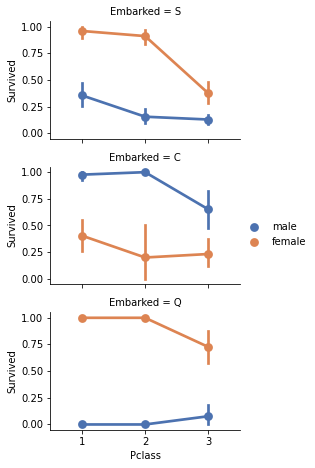

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

# Correlacionando características categóricas e numéricas

Também podemos correlacionar recursos categóricos (com valores não numéricos) e recursos numéricos. Podemos considerar a correlação Embarked (Categórico não numérico), Sexo (Categórico não numérico), Tarifa (Numérico contínuo), com Sobrevivente (Categórico numérico).

__Observações.__

* Os passageiros que pagam tarifas mais altas tiveram uma sobrevivência melhor. Confirma nossa suposição para criar faixas de tarifas (#4).
* O porto de embarque está correlacionado com as taxas de sobrevivência. Confirma a correlação (#1) e a conclusão (#2).

__Decisões__

* Considere o recurso Tarifa


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


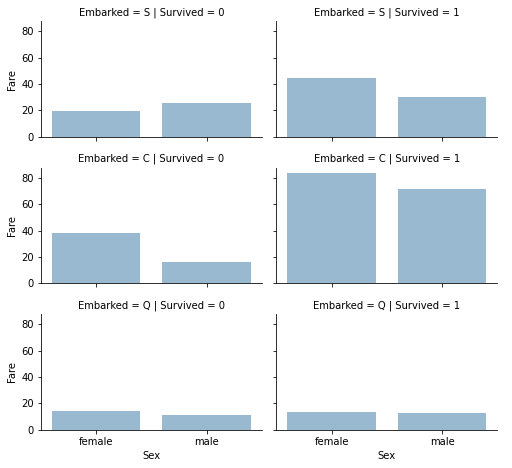

In [ ]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

# Alterando dados

Coletamos várias suposições e decisões sobre nossos conjuntos de dados e requisitos de solução. Até agora, não tivemos que alterar um único recurso ou valor para chegar a eles. Vamos agora executar nossas decisões e suposições para corrigir, criar e completar metas.

### Corrigindo descartando recursos

Este é um bom objetivo inicial para executar. Ao descartar recursos, estamos lidando com menos pontos de dados. Acelera nosso notebook e facilita a análise.

Com base em nossas suposições e decisões, queremos descartar os recursos Cabine (corrigindo o número 2) e Bilhete (corrigindo o número 1).

Observe que, quando aplicável, realizamos operações em conjuntos de dados de treinamento e teste juntos para manter a consistência.

In [ ]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

# Criando um novo recurso extraindo do existente

Queremos analisar se o recurso Name pode ser projetado para extrair títulos e testar a correlação entre títulos e sobrevivência, antes de descartar os recursos Name e PassengerId.

No código a seguir, extraímos o recurso Title usando expressões regulares. O padrão RegEx (\w+\.) corresponde à primeira palavra que termina com um caractere de ponto no recurso Nome. O sinalizador expand=False retorna um DataFrame.

__Observações.__

Quando plotamos Title, Age e Survived, observamos as seguintes observações.

* A maioria dos títulos agrupa faixas etárias com precisão. Por exemplo: Título de mestre tem idade média de 5 anos.
* A sobrevivência entre as bandas da Idade do Título varia ligeiramente.
* Certos títulos sobreviveram (Mme, Lady, Sir) ou não (Don, Rev, Jonkheer).

__Decisão.__

* Decidimos manter o novo recurso Título para treinamento de modelo.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Podemos substituir muitos títulos por um nome mais comum ou classificá-los como Raros.

In [ ]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


Podemos converter os títulos categóricos em ordinais.

In [ ]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1



Agora podemos descartar com segurança o recurso Name dos conjuntos de dados de treinamento e teste. Também não precisamos do recurso PassengerId no conjunto de dados de treinamento.

In [ ]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

## Convertendo um recurso categórico

Agora podemos converter recursos que contêm strings em valores numéricos. Isso é exigido pela maioria dos algoritmos de modelo. Isso também nos ajudará a atingir a meta de conclusão do recurso.

Vamos começar convertendo o recurso Sexo em um novo recurso chamado Gênero, onde feminino=1 e masculino=0.


In [ ]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


## Completando um recurso numérico contínuo

Agora devemos começar a estimar e completar recursos com valores ausentes ou nulos. Faremos isso primeiro para o recurso Idade.


Podemos considerar três métodos para completar um recurso numérico contínuo.

1. Uma maneira simples é gerar números aleatórios entre a média e o desvio padrão.
2. A maneira mais precisa de adivinhar os valores ausentes é usar outros recursos correlacionados. No nosso caso notamos correlação entre Idade, Sexo e Classe P. Adivinhe os valores de Idade usando valores medianos para Idade em conjuntos de combinações de recursos Pclass e Sexo. Então, Idade mediana para Pclass=1 e Sexo=0, Pclass=1 e Sexo=1, e assim por diante...
3. Combine os métodos 1 e 2. Portanto, em vez de adivinhar os valores de idade com base na mediana, use números aleatórios entre a média e o desvio padrão, com base em conjuntos de combinações Pclass e Gender.

Os métodos 1 e 3 introduzirão ruído aleatório em nossos modelos. Os resultados de várias execuções podem variar. Daremos preferência ao método 2.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


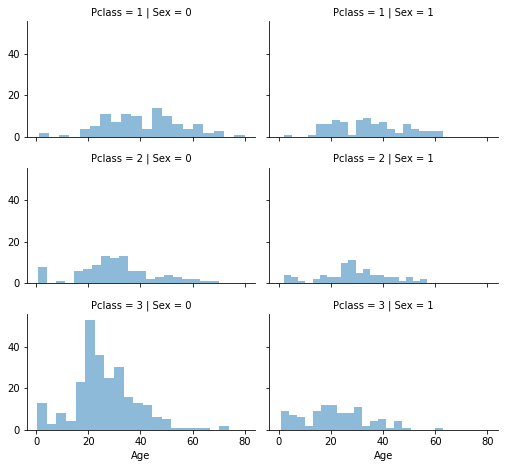

In [ ]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


Vamos começar preparando uma matriz vazia para conter valores de idade estimados com base em combinações Pclass x gênero.

In [ ]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

Agora iteramos sobre Sex (0 ou 1) e Pclass (1, 2, 3) para calcular os valores estimados de Age para as seis combinações.

In [ ]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


Vamos criar faixas etárias e determinar correlações com Sobreviveu.

In [ ]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909



Vamos substituir Age por ordinais baseados nessas bandas.

In [ ]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


Não podemos remover o recurso AgeBand.

In [ ]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


# Criar novo recurso combinando recursos existentes


Podemos criar um novo recurso para FamilySize que combina Parch e SibSp. Isso nos permitirá eliminar Parch e SibSp de nossos conjuntos de dados.

In [ ]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000



Podemos criar outro recurso chamado IsAlone.

In [ ]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Vamos abandonar os recursos Parch, SibSp e FamilySize em favor de IsAlone.

In [ ]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


Também podemos criar um recurso artificial combinando Pclass e Age.

In [ ]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


## Concluindo um recurso categórico

O recurso embarcado assume os valores S, Q, C com base no porto de embarque. Nosso conjunto de dados de treinamento tem dois valores ausentes. Nós simplesmente os preenchemos com a ocorrência mais comum.

In [ ]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


## Convertendo recurso categórico em numérico


Agora podemos converter o recurso EmbarkedFill criando um novo recurso numérico de porta.

In [ ]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


## Preenchimento rápido e conversão de um recurso numérico

Agora podemos concluir o recurso Tarifa para um único valor ausente no conjunto de dados de teste usando o modo para obter o valor que ocorre com mais frequência para esse recurso. Fazemos isso em uma única linha de código.

Observe que não estamos criando um novo recurso intermediário ou fazendo qualquer análise adicional de correlação para adivinhar o recurso ausente, pois estamos substituindo apenas um único valor. A meta de conclusão atinge o requisito desejado para o algoritmo do modelo operar em valores não nulos.

Também podemos arredondar a tarifa para duas casas decimais, pois representa a moeda.

In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


Não podemos criar FareBand.

In [ ]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


Converta o recurso Fare em valores ordinais com base na FareBand.

In [ ]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


E o conjunto de dados de teste.

In [ ]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## Modele, preveja e resolva

Agora estamos prontos para treinar um modelo e prever a solução necessária. Existem mais de 60 algoritmos de modelagem preditiva para escolher. Devemos entender o tipo de problema e o requisito de solução para restringir a alguns modelos selecionados que podemos avaliar. Nosso problema é um problema de classificação e regressão. Queremos identificar a relação entre a saída (Sobreviveu ou não) com outras variáveis ​​ou características (Gênero, Idade, Porto...). Também estamos realizando uma categoria de aprendizado de máquina chamada aprendizado supervisionado, pois estamos treinando nosso modelo com um determinado conjunto de dados. Com esses dois critérios - Aprendizado Supervisionado mais Classificação e Regressão, podemos restringir nossa escolha de modelos a alguns. Esses incluem:

* Regressão Logística
* KNN or k-Nearest Neighbors
* Support Vector Machines
* Naive Bayes classifier
* Decision Tree
* Random Forrest
* Perceptron
* Artificial neural network
* RVM or Relevance Vector Machine


In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))


A regressão logística é um modelo útil para executar no início do fluxo de trabalho. A regressão logística mede a relação entre a variável dependente categórica (característica) e uma ou mais variáveis ​​independentes (características) estimando probabilidades usando uma função logística, que é a distribuição logística cumulativa.

Observe a pontuação de confiança gerada pelo modelo com base em nosso conjunto de dados de treinamento.

In [ ]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36


Podemos usar a regressão logística para validar nossas suposições e decisões para criar recursos e concluir metas. Isso pode ser feito calculando o coeficiente das características na função de decisão.

Os coeficientes positivos aumentam as probabilidades logarítmicas da resposta (e, portanto, aumentam a probabilidade) e os coeficientes negativos diminuem as probabilidades logarítmicas da resposta (e, portanto, diminuem a probabilidade).

* Sex é o coeficiente positivo mais alto, implicando que conforme o valor de Sexo aumenta (masculino: 0 para feminino: 1), a probabilidade de Sobreviver=1 aumenta mais.
* Inversamente à medida que Pclass aumenta, a probabilidade de Survived=1 diminui mais.
* Dessa forma, Idade*Classe é um bom recurso artificial para modelar, pois tem a segunda correlação negativa mais alta com Sobreviveu.
* O título também é a segunda maior correlação positiva.

In [ ]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


Em seguida, modelamos usando Support Vector Machines, que são modelos de aprendizado supervisionado com algoritmos de aprendizado associados que analisam dados usados ​​para classificação e análise de regressão. Dado um conjunto de amostras de treinamento, cada uma marcada como pertencente a uma ou outra das duas categorias, um algoritmo de treinamento SVM constrói um modelo que atribui novas amostras de teste a uma categoria ou outra, tornando-o um classificador linear binário não probabilístico.


In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

No reconhecimento de padrões, o algoritmo k-Nearest Neighbors (ou k-NN para abreviar) é um método não paramétrico usado para classificação e regressão. Uma amostra é classificada por maioria de votos de seus vizinhos, sendo a amostra atribuída à classe mais comum entre seus k vizinhos mais próximos (k é um inteiro positivo, geralmente pequeno). Se k = 1, então o objeto é simplesmente atribuído à classe daquele único vizinho mais próximo

A pontuação de confiança KNN é melhor que a regressão logística, mas pior que SVM.

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

No aprendizado de máquina, os classificadores ingênuos de Bayes são uma família de classificadores probabilísticos simples baseados na aplicação do teorema de Bayes com fortes suposições de independência (ingênuas) entre os recursos. Os classificadores Naive Bayes são altamente escaláveis, exigindo um número de parâmetros lineares no número de variáveis ​​(recursos) em um problema de aprendizado


A pontuação de confiança gerada pelo modelo é a mais baixa entre os modelos avaliados até agora.

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

O perceptron é um algoritmo para aprendizado supervisionado de classificadores binários (funções que podem decidir se uma entrada, representada por um vetor de números, pertence ou não a alguma classe específica). É um tipo de classificador linear, ou seja, um algoritmo de classificação que faz suas previsões com base em uma função preditora linear combinando um conjunto de pesos com o vetor de características. O algoritmo permite o aprendizado online, na medida em que processa os elementos do conjunto de treinamento um por vez.

In [ ]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

In [ ]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


79.12

In [ ]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.54

Este modelo usa uma árvore de decisão como um modelo preditivo que mapeia recursos (galhos de árvores) para conclusões sobre o valor alvo (folhas de árvores). Os modelos de árvore em que a variável de destino pode assumir um conjunto finito de valores são chamados de árvores de classificação; nessas estruturas de árvore, as folhas representam rótulos de classe e os ramos representam conjunções de recursos que levam a esses rótulos de classe. As árvores de decisão em que a variável de destino pode assumir valores contínuos (normalmente números reais) são chamadas de árvores de regressão.

A pontuação de confiança do modelo é a mais alta entre os modelos avaliados até agora.

In [ ]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

O próximo modelo Random Forests é um dos mais populares. Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas, que operam construindo uma infinidade de árvores de decisão (n_estimators=100) no tempo de treinamento e gerando a classe que é o modo das classes (classificação). ou previsão média (regressão) das árvores individuais


A pontuação de confiança do modelo é a mais alta entre os modelos avaliados até agora. Decidimos usar a saída deste modelo (Y_pred) para criar nossa submissão de resultados da competição.

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

# Avaliação do modelo

Agora podemos classificar nossa avaliação de todos os modelos para escolher o melhor para o nosso problema. Embora a Árvore de Decisão e a Floresta Aleatória tenham a mesma pontuação, optamos por usar a Floresta Aleatória, pois elas corrigem o hábito das árvores de decisão de superajustar seu conjunto de treinamento.

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,79.12
5,Perceptron,78.34
0,Support Vector Machines,78.23
6,Stochastic Gradient Decent,76.54
4,Naive Bayes,72.28


In [67]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

submission.to_csv('Submission.csv',index=False)